We will be covering:

1. **Loading the dataset**
2. **Data Cleaning** 
    * Deleting redundant columns
    * Renaming columns
    * Dropping duplicates
    * Cleaning individual columns  
    * Remove the Nan from the dataset       

Transformations:

3. **Regression Analysis**
    * Linear Regression
    * Decision Tree Regression
    * Random Forest Regression
4. **Data Visualisation** - using plots to find the relation between the features

    * Restaurants delivering online or not
    * Restaurants allowing table booking or not
    * Table booking Rate vs Rate
    * Best Location
    * Relation between Location and Rating
    * Restaurant Type
    * Gaussian Rest type and Rating
    * Types of Services
    * Relation between Type and Rating
    * Cost of Restuarant
    * No. of restaurants in a Location
    * Restaurant type
    * Most famous restaurant chains in Bengaluru

### The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the dataset
data = pd.read_csv("zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
#info about the dataset; datatype of the corresponding columns & missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# dropping the unnecesssary columns & saving them to newdataset as 'zomato_data'
zomato_data = data.drop(['url','dish_liked','phone'],axis=1)

In [5]:
# looking at first fivedataset after transformation
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# removing the duplicates
zomato_data.duplicated().sum()
zomato_data.drop_duplicates(inplace=True)
zomato_data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# remove the Nan values from the dataset
zomato_data.isnull().sum()
zomato_data.dropna(how='any',inplace=True)
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [8]:
# reading the column names
zomato_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
#changing the column names
zomato_data = zomato_data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
zomato_data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [10]:
zomato_data['cost'] = zomato_data['cost'].astype(str) #changing the cost
#using lambda function to replace ',' from cost eg: 1,200 --> 1.200
zomato_data['cost'] = zomato_data['cost'].apply(lambda x: x.replace(',','.'))
#converting the 'cost' from str to float eg: 1.200 --> 1.2
zomato_data['cost'] = zomato_data['cost'].astype(float) 
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [11]:
# reading unique values from the 'rate' column 
zomato_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# now to remove '/5' from the rate
#accessing the row&columns by label; here we are accessing all except "new" 
zomato_data = zomato_data.loc[zomato_data.rate != "NEW"]
#removing "-" 
zomato_data = zomato_data.loc[zomato_data.rate != "-"].reset_index(drop=True)
#removing "/"
remove_slash = lambda x: x.replace('/5','') if type(x) == str else x
zomato_data.rate = zomato_data.rate.apply(remove_slash).astype('float')
zomato_data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
print(zomato_data.online_order,zomato_data.book_table)

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
41232     No
41233     No
41234     No
41235     No
41236     No
Name: online_order, Length: 41237, dtype: object 0        Yes
1         No
2         No
3         No
4         No
        ... 
41232     No
41233     No
41234     No
41235    Yes
41236     No
Name: book_table, Length: 41237, dtype: object


In [14]:
#Adjusting the column names
zomato_data.online_order.replace(('Yes','No'),(True,False),inplace = True)
zomato_data.book_table.replace(('Yes','No'),(True,False),inplace = True)
print(zomato_data.online_order, zomato_data.book_table)

0         True
1         True
2         True
3        False
4        False
         ...  
41232    False
41233    False
41234    False
41235    False
41236    False
Name: online_order, Length: 41237, dtype: bool 0         True
1        False
2        False
3        False
4        False
         ...  
41232    False
41233    False
41234    False
41235     True
41236    False
Name: book_table, Length: 41237, dtype: bool


In [15]:
#checking the unique cost
zomato_data['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [16]:
# encode the input variables but not encoding the variables such as cost, rate, votes
#check whether data is present using 'isin' & '~' used to negate the values means except those
def Encode(zomato_data): 
    for column in zomato_data.columns[~zomato_data.columns.isin(['rate','cost','votes'])]:
        zomato_data[column] = zomato_data[column].factorize()[0] # this encodes the datawith unique values
                                                                 # [0] used to access only the encoded part
    return zomato_data
zomato_en = Encode(zomato_data.copy())
zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

<Figure size 1080x504 with 0 Axes>

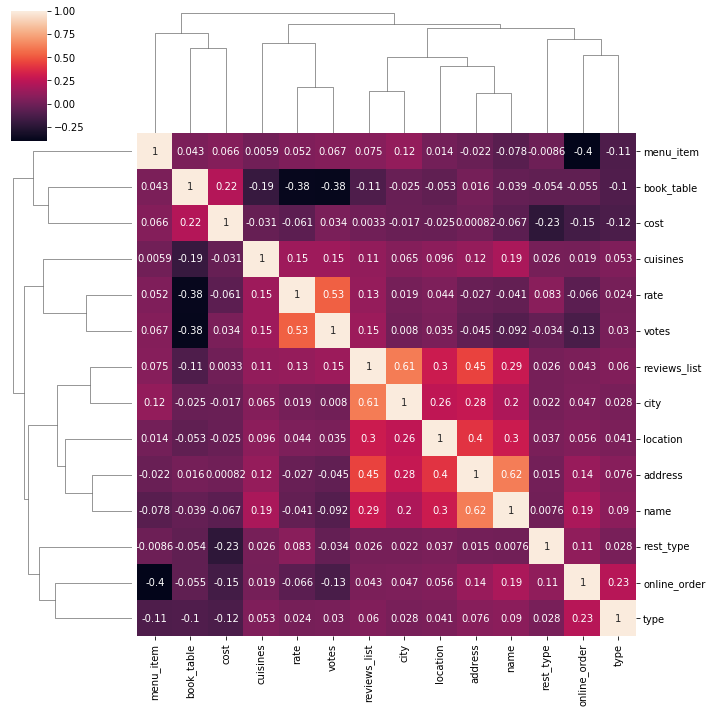

In [17]:
# get correlations between various variable
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,7))
sns.clustermap(corr,annot=True,)
zomato_data.columns

The highest correlation is between **name** and **address** which is **0.62** which is not of very much concern

### Regression Analysis

#### Splitting the dataset

In [40]:
# defining the independent & dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]] #independent variable 
y = zomato_en['rate'] #dependent variable
print(x)
# getting test & training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 353)


       online_order  book_table  votes  location  rest_type  cuisines   cost  \
0                 0           0    775         0          0         0  800.0   
1                 0           1    787         0          0         1  800.0   
2                 0           1    918         0          1         2  800.0   
3                 1           1     88         0          2         3  300.0   
4                 1           1    166         1          0         4  600.0   
...             ...         ...    ...       ...        ...       ...    ...   
41232             1           1     34        25         28       204  800.0   
41233             1           1     81        25         28       761  800.0   
41234             1           1     27        25         17       240    1.5   
41235             1           0    236        56         17       237    2.5   
41236             1           1     13        56         33      1870    1.5   

       menu_item  
0              0  
1

In [41]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
9792,0,1,10,30,13,50,300.0,1900
18964,0,1,37,66,0,68,750.0,0
32151,0,1,6,80,2,79,200.0,0
7739,0,1,259,18,0,1429,750.0,1479
39367,0,0,491,23,0,714,900.0,0


In [42]:
y_train.head()

9792     3.5
18964    3.6
32151    3.6
7739     3.7
39367    4.1
Name: rate, dtype: float64

In [21]:
#seeing the unique values in 'menu_items'
zomato_en['menu_item'].unique()

array([   0,    1,    2, ..., 8240, 8241, 8242], dtype=int64)

In [22]:
#seeing the unique values in 'location'
zomato_en['location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

In [23]:
#seeing the unique values in 'cuisines'
zomato_en['cuisines'].unique()

array([   0,    1,    2, ..., 2364, 2365, 2366], dtype=int64)

In [24]:
zomato_en['rest_type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86], dtype=int64)

## Data Visualisation

#### Restaurants delivering Online or not

Text(0.5, 1.0, 'Restaurants delivering online or not')

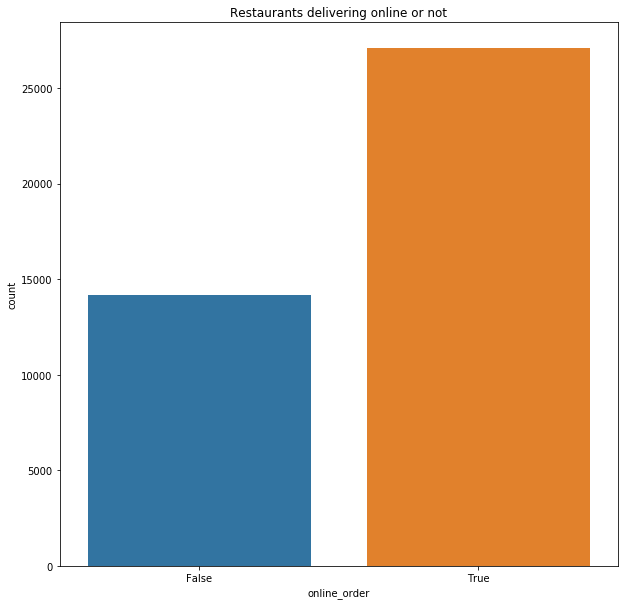

In [25]:
sns.countplot(zomato_data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Restaurants delivering online or not")

### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

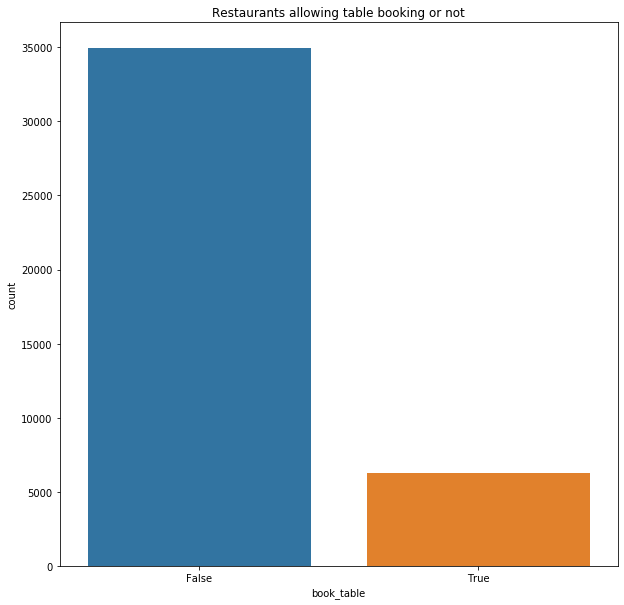

In [26]:
sns.countplot(zomato_data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Restaurants allowing table booking or not")

### Table booking Rate vs Normal Rate

In [27]:
Y = pd.crosstab(zomato_data['rate'],zomato_data['book_table'])
print(Y)

book_table  False  True
rate                   
1.8             5     0
2.0            11     0
2.1            24     0
2.2            13    13
2.3            51     0
2.4            66     0
2.5            98     2
2.6           245     4
2.7           299     4
2.8           574     6
2.9           792     9
3.0           981     9
3.1          1540    10
3.2          1821    23
3.3          2267     5
3.4          2428    16
3.5          2677    86
3.6          3214    72
3.7          3589   218
3.8          3465   351
3.9          3398   556
4.0          2459   685
4.1          1937   988
4.2          1204   950
4.3           923   759
4.4           369   777
4.5           233   423
4.6           167   133
4.7            50   117
4.8            23    43
4.9            15    40


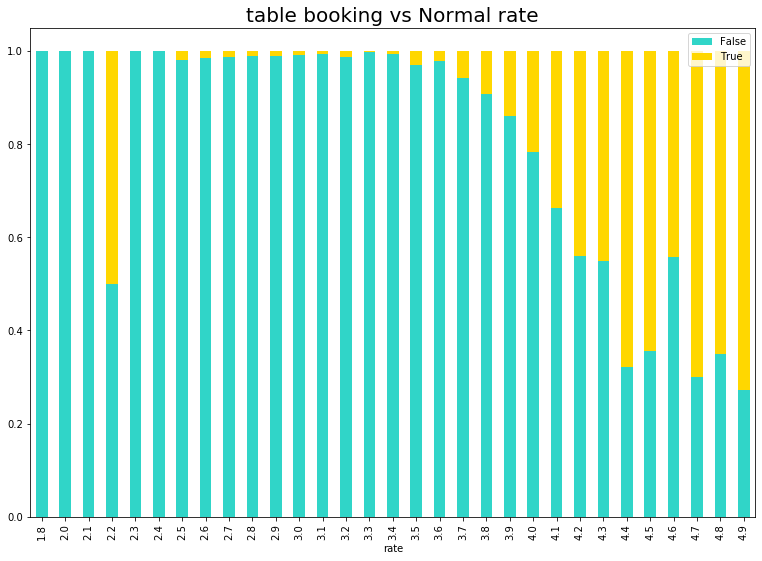

In [28]:
plt.rcParams['figure.figsize'] = (13, 9)
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['#30D5C8','gold'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

### Location

Text(0.5, 1.0, 'Location wise count for restaurants')

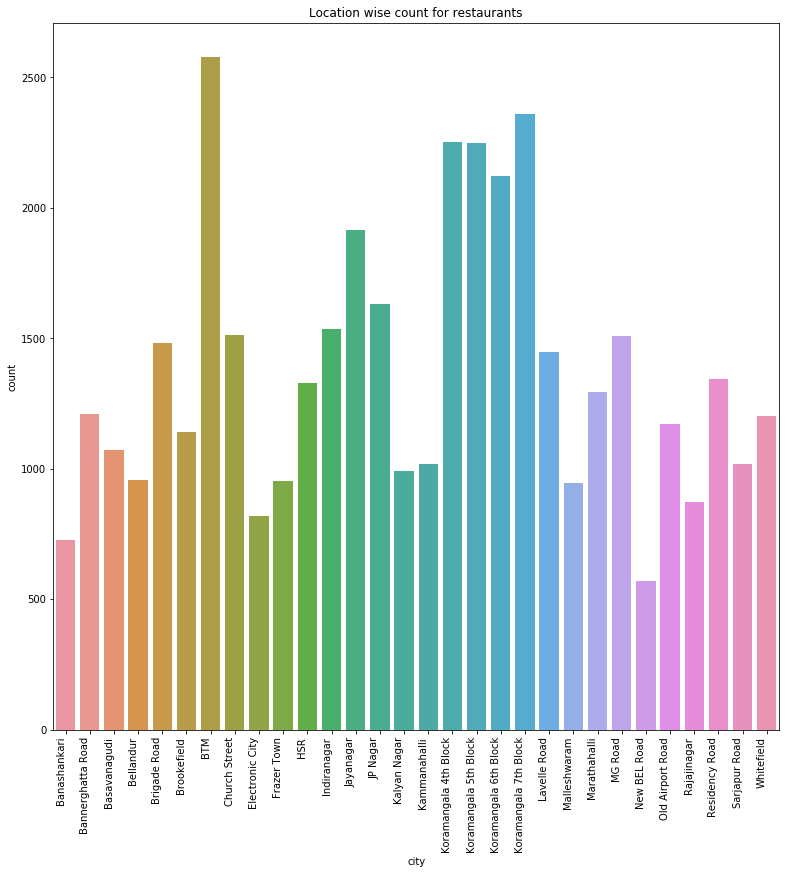

In [29]:
sns.countplot(zomato_data['city'])
sns.countplot(zomato_data['city']).set_xticklabels(sns.countplot(zomato_data['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

### Location & Rating

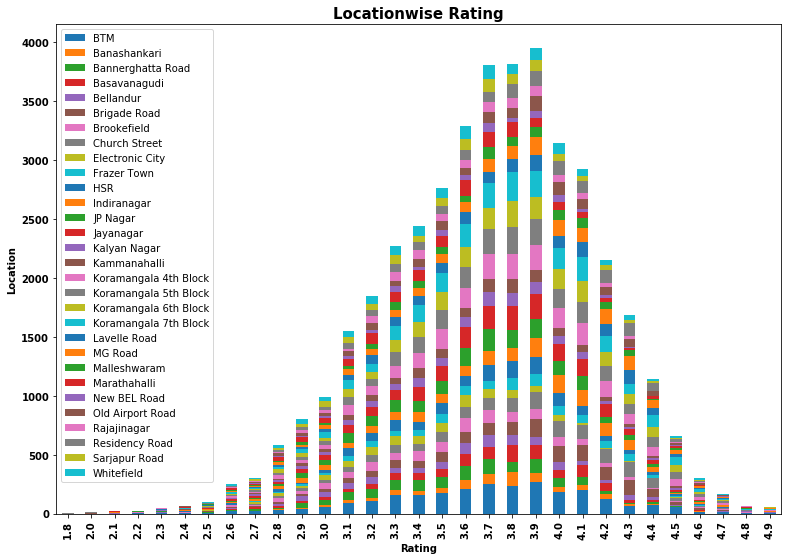

In [30]:
loc_plt=pd.crosstab(zomato_data['rate'],zomato_data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend()

### Restaurant type

In [ ]:
sns.countplot(zomato_data['rest_type'])
sns.countplot(zomato_data['rest_type']).set_xticklabels(sns.countplot(zomato_data['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('Restaurant Type')

Text(0.5, 1.0, 'Restaurant types')

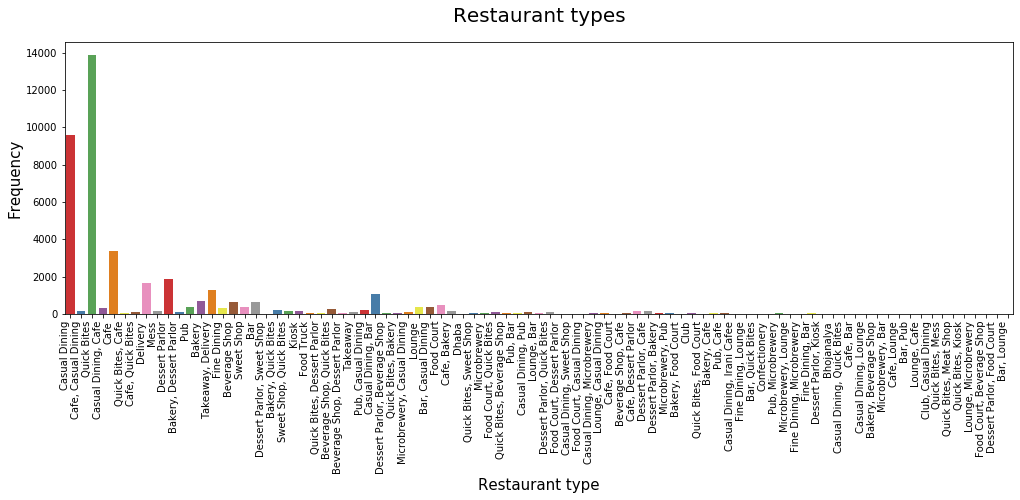

In [32]:
#another approach
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

### Gaussian Rest type and Rating

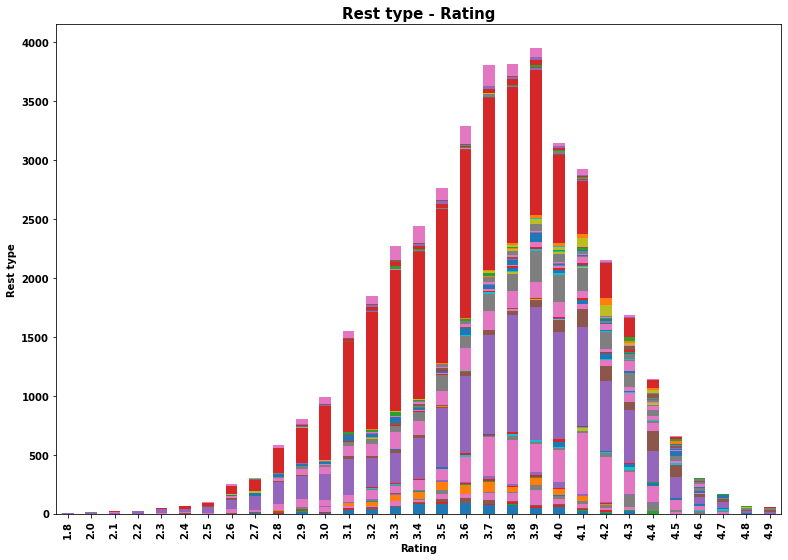

In [33]:
loc_plt=pd.crosstab(zomato_data['rate'],zomato_data['rest_type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.legend().remove()

### Types of services

Text(0.5, 1.0, 'Type of Service')

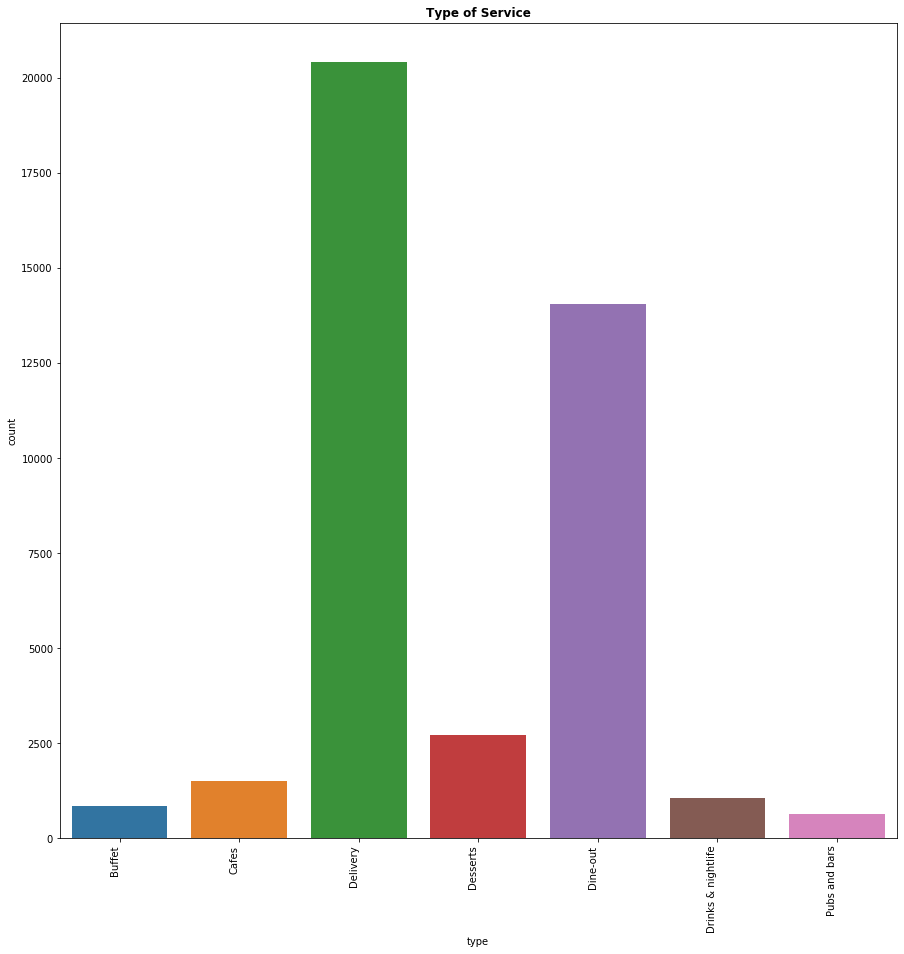

In [34]:
sns.countplot(zomato_data['type'])
sns.countplot(zomato_data['type']).set_xticklabels(sns.countplot(zomato_data['type']).get_xticklabels(),rotation=90,ha='right')
fig = plt.gcf() 
fig.set_size_inches(15,15)
plt.title('Type of Service',fontsize=12,fontweight='bold')

### Type & Rating 

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text yticklabel objects>)

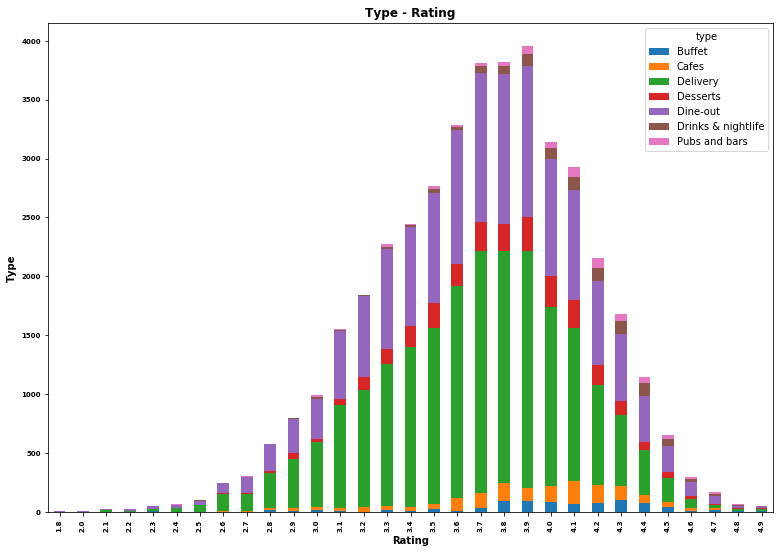

In [35]:
type_plt=pd.crosstab(zomato_data['rate'],zomato_data['type'])
type_plt.plot(kind='bar',stacked=True)
plt.title('Type - Rating',fontsize=12,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=7,fontweight='bold')
plt.yticks(fontsize=7,fontweight='bold')

### Cost of Restaurant

Text(0.5, 0, 'Cost')

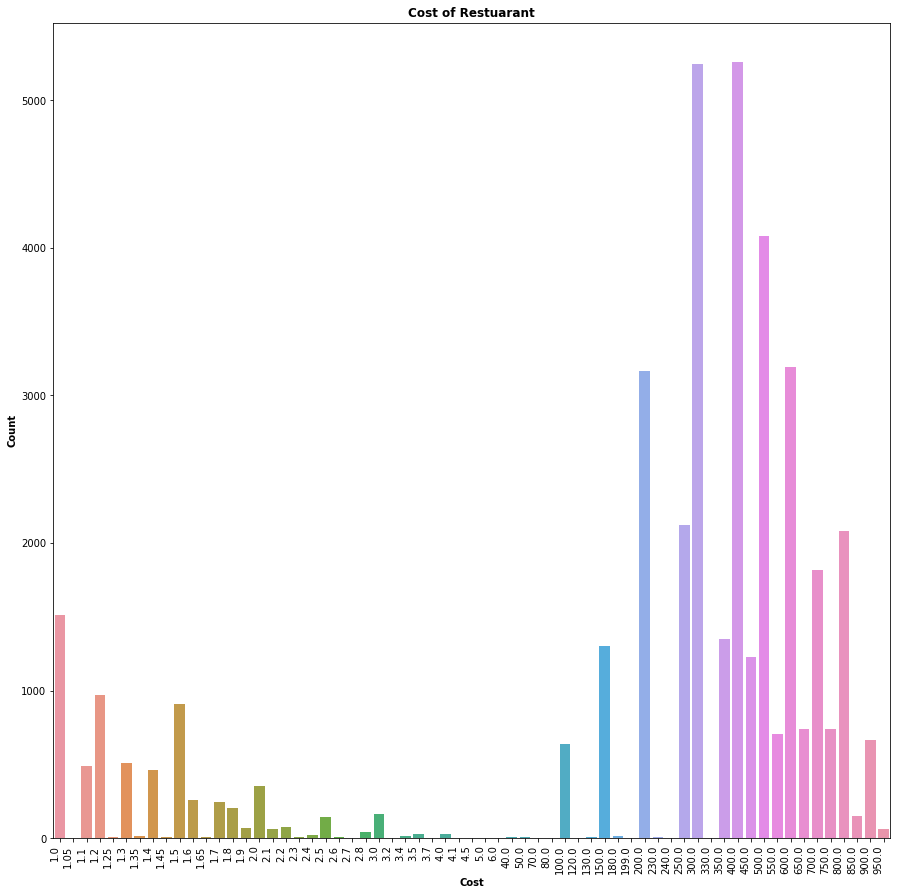

In [36]:
sns.countplot(zomato_data['cost'])
sns.countplot(zomato_data['cost']).set_xticklabels(sns.countplot(zomato_data['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant',fontweight='bold')
plt.ylabel('Count',fontsize=10,fontweight='bold')
plt.xlabel('Cost',fontsize=10,fontweight='bold')

### No. of restaurants in a location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

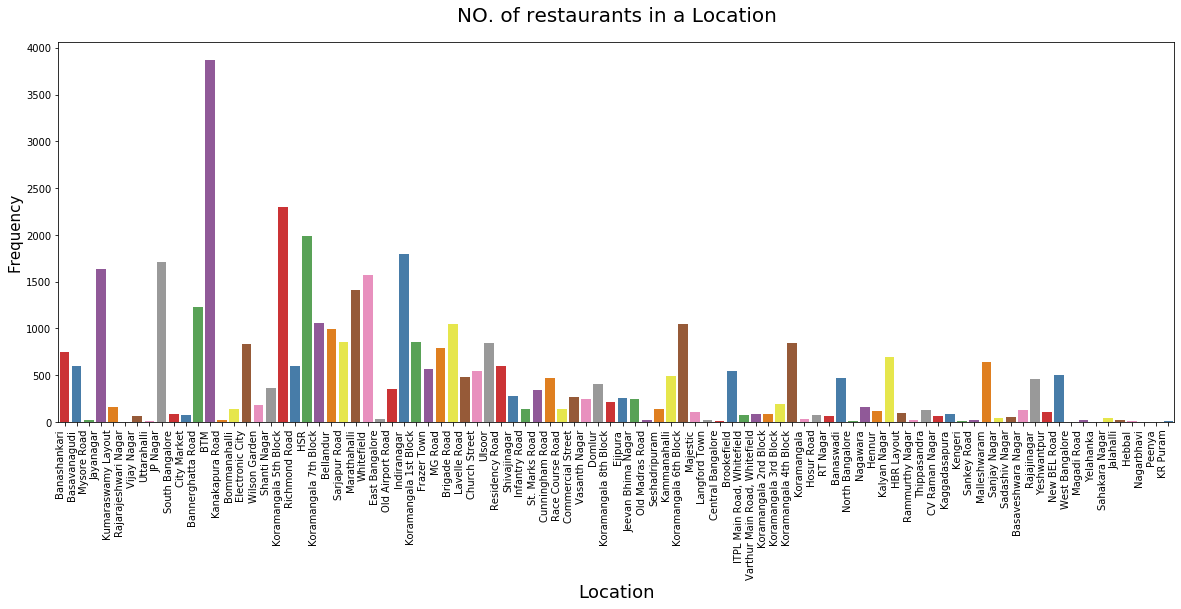

In [37]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

### Most famous Restaurant chains in Bengaluru

Text(0, 0.5, 'Restaurants')

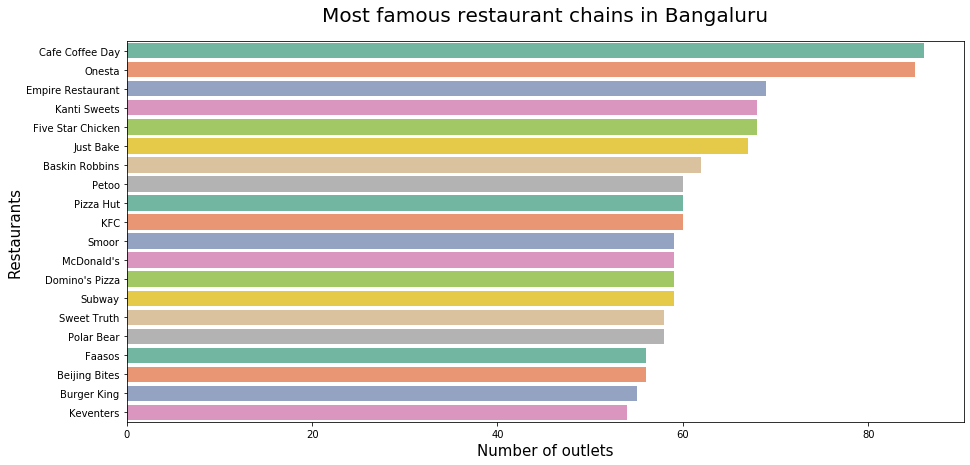

In [38]:
plt.figure(figsize=(15,7))
chains=zomato_data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set2')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.ylabel("Restaurants",size=15)

## Applying different Machine Learning Algortithms

### Linear Regression

In [43]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2814808187801201

### Decision Tree Regression

In [44]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8542983039578294

### Random Forest Regression

In [ ]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

### Extra Tree Regressor

In [46]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9387758184370772

In [48]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))

It can be observed that we have got the best accuracy for Extra tree regressor